## Insuline Simulation with Taylor Approximation

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify, series, exp

100 = blood sugar value in the beginning (100mg/dL) <br>
30 = increase (for example by carbohydrates) <br>
np.exp(-0.5 * t) = exponential decline of the blood sugar <br>
40 = insuline action <br>
np.exp(-0.1 * t) = starts at 1, drops slowly 

In [42]:
def glucose(t): 
    return 100 + 30 * np.exp(-0.5 * t) - 40 * (1 - np.exp(-0.1 * t))



##### Symbolic Definition 

In [45]:
t = symbols('t')
glucose_expr = 100 + 30 * exp(-0.5 * t) - 40 * (1 - exp(-0.1 * t))

a = 1 stands for one hour after intake <br>
f1 = f'(t) = 1. Derivate of f, describes how fast the blood sugar increases or drops <br>
f2 = f''(t) = 2. Derivate

In [48]:
## Taylor approximation 2. grade at t=1
a = 1
f = glucose_expr
f1 = diff(f, t)
f2 = diff(f1, t)
f3 = diff(f2, t)


#### 2nd order Taylor approximation:
$$
T_2(x) = f(a) + f'(a)(x - a) + \frac{f''(a)}{2}(x - a)^2
$$

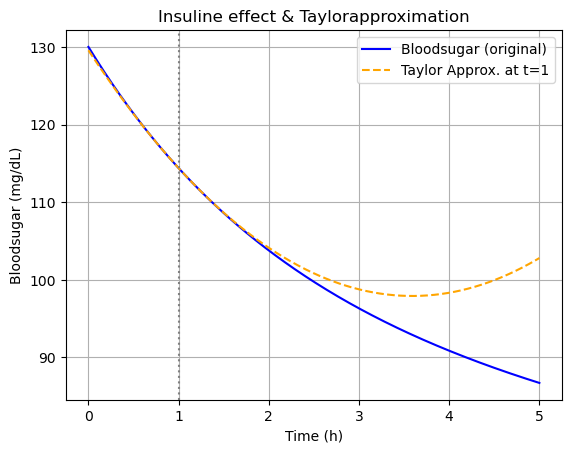

In [51]:
f_func = lambdify(t, f)
f1_func = lambdify(t, f1)
f2_func = lambdify(t, f2)


def taylor_approx(x):
    return f_func(a) + f1_func(a) * (x-a) + f2_func(a)/2*(x-a)**2

# Plot

t_vals = np.linspace(0, 5, 400)
g_vals = [f_func(val) for val in t_vals]
p_vals = [taylor_approx(val) for val in t_vals]

plt.plot(t_vals, g_vals, label = 'Bloodsugar (original)', color = 'blue')
plt.plot(t_vals, p_vals, label = 'Taylor Approx. at t=1', linestyle = '--', color = 'orange')
plt.axvline(x=1, color='grey', linestyle=':')
plt.legend()
plt.xlabel('Time (h)')
plt.ylabel('Bloodsugar (mg/dL)')
plt.title('Insuline effect & Taylorapproximation')
plt.grid(True)
plt.show()

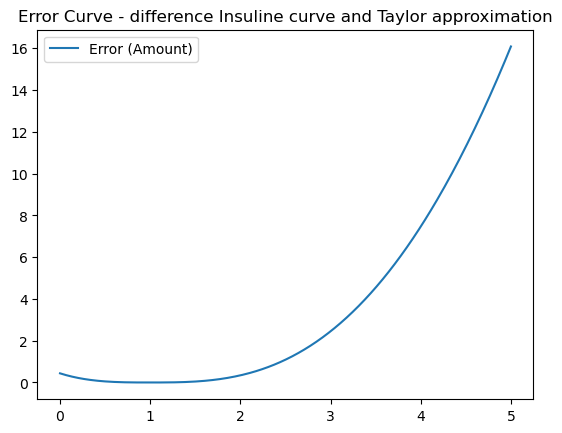

In [53]:
x_vals = np.linspace(0, 5, 300)
f_vals = f_func(x_vals)
taylor_vals = taylor_approx(x_vals)
error = np.abs(f_vals - taylor_vals)
plt.plot(x_vals, error, label='Error (Amount)')
plt.title('Error Curve - difference Insuline curve and Taylor approximation')
plt.legend()
plt.show()

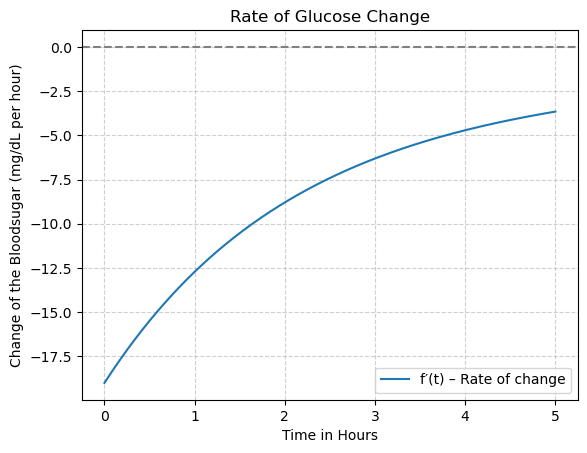

In [55]:
plt.plot(x_vals, f1_func(x_vals), label="f′(t) – Rate of change")
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.title("Rate of Glucose Change")
plt.xlabel('Time in Hours')
plt.ylabel('Change of the Bloodsugar (mg/dL per hour)')
plt.grid(True, linestyle= '--', alpha = 0.6)
plt.show()